In [0]:
#Importing required packages...
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [0]:
train_file= pd.read_csv('/content/train.csv')
test_file= pd.read_csv('/content/test.csv')

In [0]:
train_file['data']='train'
test_file['data']='test'
test_file['is_pass']=np.nan

In [0]:
train_file.shape, test_file.shape

((73147, 17), (31349, 17))

In [0]:
full= pd.concat([train_file, test_file], axis=0)

In [0]:
full.shape

(104496, 17)

In [0]:
full.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,data
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0.0,train
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1.0,train
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1.0,train
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1.0,train
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1.0,train


## **Preprocessing steps**

In [0]:
full.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                      float64
data                          object
dtype: object

In [0]:
#Checking the missing values in the dataset...
full.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          39520
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating      108
is_pass                      31349
data                             0
dtype: int64

**Here we see that 'age' and 'trainee_engagement_rating' columns has missing values. Lets fill out the missing values...**

In [0]:
full['age'].mean(), full['trainee_engagement_rating'].median()

(36.47803804481655, 2.0)

In [0]:
full['age'].fillna(36, inplace=True)
full['trainee_engagement_rating'].fillna(2.0, inplace=True)

In [0]:
full.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                              0
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating        0
is_pass                      31349
data                             0
dtype: int64

In [0]:
#Converting the float values to integers...
full['age']= full['age'].astype(int)
full['trainee_engagement_rating']= full['trainee_engagement_rating'].astype(int)

In [0]:
full.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                            int64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating      int64
is_pass                      float64
data                          object
dtype: object

In [0]:
full.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,data
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24,5,N,1,0.0,train
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26,2,N,3,1.0,train
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40,1,N,2,1.0,train
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,36,4,N,1,1.0,train
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42,2,N,4,1.0,train


In [0]:
full.shape

(104496, 17)

**Lets remove the features that doesn't make any sense in our model prediction...**

In [0]:
#Here we see that 'id', 'program_id', 'test_id', 'trainee_id' columns will not make any sense in predicting our model.. Hence we drop these columns!
full= full.drop(['id', 'program_id', 'test_id', 'trainee_id'], axis=1)

In [0]:
full.shape

(104496, 13)

**Creating dummies for categorical variables..**

In [0]:
cat_cols= ['program_type', 'test_type', 'difficulty_level', 'gender', 'education', 'is_handicapped']

In [0]:
for col in cat_cols:
  k= full[col].value_counts(normalize=True)
  cats= k.index[k>0.007][:-1]
  for cat in cats:
    name= col+'_'+cat
    full[name]= (full[col]==cat).astype(int)
  del full[col]

In [0]:
full.head()

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass,data,program_type_Y,program_type_T,program_type_V,program_type_U,program_type_Z,program_type_X,test_type_offline,difficulty_level_easy,difficulty_level_intermediate,difficulty_level_hard,gender_M,education_High School Diploma,education_Matriculation,education_Bachelors,education_Masters,is_handicapped_N
0,136,3,24,5,1,0.0,train,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1
1,131,4,26,2,3,1.0,train,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
2,120,1,40,1,2,1.0,train,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
3,117,3,36,4,1,1.0,train,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
4,131,1,42,2,4,1.0,train,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1


In [0]:
full.shape

(104496, 23)

**After done with Preprocessing steps, lets split the data again back to TRAIN and TEST file**

In [0]:
train_file= full[full['data']=='train']
del train_file['data']
test_file= full[full['data']=='test']
test_file.drop(['is_pass', 'data'], axis=1, inplace=True)

In [0]:
#Converting target variable 'is_pass' to INT value...
train_file['is_pass']= train_file['is_pass'].astype(int)

In [0]:
train_file.shape, test_file.shape

((73147, 22), (31349, 21))

## **Feature Selection**

In [0]:
#Importing required packages...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

In [0]:
X= train_file.drop(['is_pass'], axis=1)
Y= train_file['is_pass']

In [0]:
#Splitting the data into TRAIN and TEST...
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=22, stratify=Y)

In [0]:
lr= LogisticRegression(class_weight='balanced')

In [0]:
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted= lr.predict(X_test)

In [0]:
roc_auc_score(Y_test, predicted), accuracy_score(Y_test, predicted)

(0.6404513220413637, 0.6368421052631579)

We see that by using all the available features we get a ROC_AUC_SCORE of 64%.

Now lets look at a Feature Importance plot highlighting the top 10 important features to predict our target variable.


In [0]:
et= ExtraTreesClassifier(class_weight='balanced')

In [0]:
et.fit(X_train, Y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

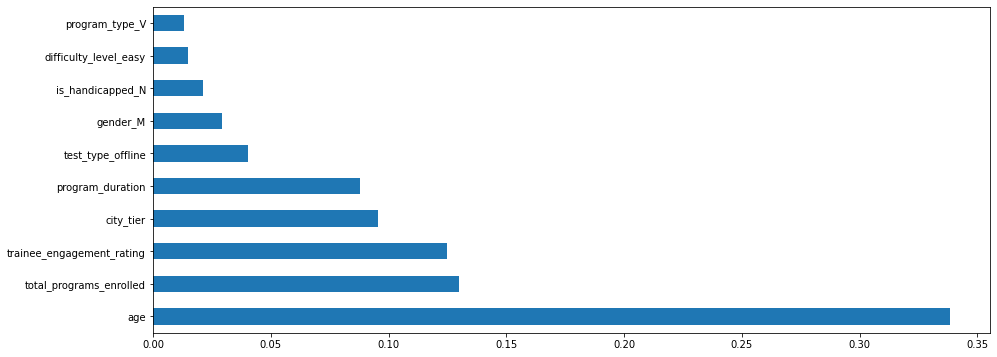

In [0]:
feat_importance= pd.Series(et.feature_importances_, index= X_train.columns)
feat_importance.nlargest(10).plot(kind='barh', figsize=(15,6))
plt.show()

**Now lets use Recursive Feature Elimination method to eliminate the features which doesn't contribute much in predicting our Target variable.**

In [0]:
rfe= RFE(lr, 10)

In [0]:
fit= rfe.fit(X_train, Y_train)

In [0]:
print('Num features: %d' %fit.n_features_)
print('Feature Ranking: %s' %fit.ranking_)

Num features: 10
Feature Ranking: [11  7 12 10  1  5  1  6  9  1  1  1  1  1  1  8  2  3  1  1  4]


Here we took Linear Regression model with 10 features and RFE gave feature ranking as above, but the selection of number 10 was random.

Now we need to find the optimum number of features, for which the accuracy is highest. We do that by using loop starting with 1 feature and going up to 21.

We then take the one for which the accuracy is highest.


In [0]:
#No. of features
nof_list= np.arange(1,21)
high_score= 0
#Variable to store the optimum features.
nof=10
score_list= []
for n in range(len(nof_list)):
  model= LogisticRegression(class_weight='balanced')
  rfe= RFE(model, nof_list[n])
  X_train_rfe= rfe.fit_transform(X_train, Y_train)
  X_test_rfe= rfe.transform(X_test)
  model.fit(X_train_rfe, Y_train)
  score= model.score(X_test_rfe,Y_test)
  score_list.append(score)
  if score>high_score:
    high_score= score
    nof= nof_list[n]

print('Optimum No. of features: %d' %nof)
print('Sort with %d features: %f' %(nof, high_score))

Optimum No. of features: 9
Sort with 9 features: 0.647368


**We now feed 9 as the number of features to RFE and get the final set of features given by RFE method, as follows:**

In [0]:
cols= list(X.columns)
model= LogisticRegression(class_weight='balanced')

#Initializing RFE model..
rfe= RFE(model,9)

#Transforming data using RFE
X_rfe= rfe.fit_transform(X_train, Y_train)

#Fitting the data to the model...
model.fit(X_rfe, Y_train)
temp= pd.Series(rfe.support_, index=cols)
selected_features_rfe= temp[temp==True].index
print(selected_features_rfe)

Index(['trainee_engagement_rating', 'program_type_T', 'program_type_Z',
       'program_type_X', 'test_type_offline', 'difficulty_level_easy',
       'difficulty_level_intermediate', 'difficulty_level_hard',
       'education_Masters'],
      dtype='object')


**Hence, we conclude that the above 9 features would be used in our Model builing process.**

## **Model Building**

### ***Using Logistic Regression***

In [0]:
X_rfe= train_file.drop(['is_pass'], axis=1)
Y_rfe= train_file['is_pass']

In [0]:
#Splitting the data into TRAIN and TEST...
X_train_rfe, X_test_rfe, Y_train_rfe, Y_test_rfe= train_test_split(X_rfe, Y_rfe, test_size=0.2, random_state=11, stratify=Y_rfe)

In [0]:
lr= LogisticRegression(class_weight='balanced')

In [0]:
lr.fit(X_train_rfe, Y_train_rfe)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted_rfe= lr.predict(X_test_rfe)

In [0]:
roc_auc_score(Y_test_rfe, predicted_rfe), accuracy_score(Y_test_rfe, predicted_rfe), f1_score(Y_test_rfe, predicted_rfe)

(0.641439028233689, 0.636637047163363, 0.7065901313610774)

### **Using Random Forest**

In [0]:
#Importing required packages..
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [0]:
rf= RandomForestClassifier(class_weight='balanced', verbose=1, n_jobs=-1, random_state=11)

In [0]:
params= {
    'n_estimators': [800,1000,1300],
    'bootstrap': [True, False],
    'max_depth': [None,2,5],
    'min_samples_split': [15,20,25,30],
    'min_samples_leaf': [5,8,10,12],
    'max_features': [9,15,18,21]
}

In [0]:
random_search= RandomizedSearchCV(rf, cv=5, param_distributions= params, n_iter=10, scoring= 'roc_auc')

In [0]:
random_search.fit(X_train_rfe, Y_train_rfe)

In [0]:
rf_best= random_search.best_estimator_

In [0]:
#Using the report function given below we can see the cv performance of top few models 
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
report(random_search.cv_results_, 3)

Model with rank: 1
Mean validation score: 0.729 (std: 0.005)
Parameters: {'n_estimators': 1000, 'min_samples_split': 25, 'min_samples_leaf': 8, 'max_features': 15, 'max_depth': None, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.729 (std: 0.005)
Parameters: {'n_estimators': 1000, 'min_samples_split': 25, 'min_samples_leaf': 12, 'max_features': 9, 'max_depth': None, 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.728 (std: 0.005)
Parameters: {'n_estimators': 1300, 'min_samples_split': 30, 'min_samples_leaf': 10, 'max_features': 18, 'max_depth': None, 'bootstrap': True}



**From above we can see that Model Rank-1 has best parameters, hence we will take those parameters into consideration.**

In [0]:
best_parameters= {'n_estimators': 1000, 'min_samples_split': 25, 'min_samples_leaf': 8, 'max_features': 15, 'max_depth': None, 'bootstrap': True}

In [0]:
rf_best= RandomForestClassifier(n_estimators=1000, min_samples_split=25, min_samples_leaf=8, max_features=15, max_depth= None, bootstrap=False, 
                                verbose=1, n_jobs=-1, random_state=14, class_weight='balanced')

In [0]:
rf_best.fit(X_train_rfe, Y_train_rfe)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=14, verbose=1,
                       warm_start=False)

In [0]:
predicted_rf= rf_best.predict(X_test_rfe)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    2.6s finished


In [0]:
roc_auc_score(Y_test_rfe, predicted_rf), accuracy_score(Y_test_rfe, predicted_rf), f1_score(Y_test_rfe, predicted_rf)

(0.6727090898438975, 0.680041011619959, 0.7503599808010238)

### **Using XGBoost**

In [0]:
#Importing required packages...
import xgboost as xgb

In [0]:
xgbst= xgb.XGBClassifier(objective='binary:logistic')

In [0]:
xgb_params= {
    'learning_rate':[0.5,0.7,0.9],
    'gamma': [i/10.0 for i in range(0,5)],
    'max_depth': [4,5,8,10],
    'min_child_weight': [1,2,5],
    'max_delta_step': [0,1,2,5],
    'sub_sample': [i/10.0 for i in range(5,10)],
    'col_sample_bytree': [i/10.0 for i in range(5,10)],
    'col_sample_bylevel': [i/10.0 for i in range(5,10)],
    'reg_lambda': [1e-5,1e-2, 0.1, 1, 100],
    'reg_alpha': [1e-5,1e-2, 0.1, 1, 100],
    'scale_pos_weight': [2],
    'n_estimators': [200,300,500,800]
}

In [0]:
random_search_xgb= RandomizedSearchCV(xgbst, verbose=1, n_jobs=-1, cv=5, n_iter= 10, scoring='roc_auc', param_distributions=xgb_params)

In [0]:
random_search_xgb.fit(X_train_rfe, Y_train_rfe)

In [0]:
xgb_best= random_search_xgb.best_estimator_

In [0]:
report(random_search_xgb.cv_results_, 3)

Model with rank: 1
Mean validation score: 0.733 (std: 0.005)
Parameters: {'sub_sample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 100, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 8, 'max_delta_step': 2, 'learning_rate': 0.7, 'gamma': 0.0, 'col_sample_bytree': 0.9, 'col_sample_bylevel': 0.8}

Model with rank: 2
Mean validation score: 0.723 (std: 0.002)
Parameters: {'sub_sample': 0.6, 'scale_pos_weight': 2, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 5, 'max_delta_step': 1, 'learning_rate': 0.7, 'gamma': 0.4, 'col_sample_bytree': 0.8, 'col_sample_bylevel': 0.8}

Model with rank: 3
Mean validation score: 0.722 (std: 0.004)
Parameters: {'sub_sample': 0.5, 'scale_pos_weight': 2, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 5, 'max_delta_step': 1, 'learning_rate': 0.9, 'gamma': 0.2, 'col_sample_bytree': 0.5, 'col_sample_bylevel': 0.9}



**From above we can see that Model Rank-1 has best parameters, hence we will take those parameters into consideration.**

In [0]:
xgb_best_parameters= {'sub_sample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 100, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 1,
                      'max_depth': 8, 'max_delta_step': 2, 'learning_rate': 0.7, 'gamma': 0.0, 'col_sample_bytree': 0.9, 'col_sample_bylevel': 0.8}

In [0]:
xgb_best= xgb.XGBClassifier(verbose=1, n_jobs=-1, scoring='roc_auc', subsample=0.7, scale_pos_weight=2, reg_lambda=100, reg_alpha=0.1, n_estimators=300,  
                            min_child_weight=1, max_depth=8, max_delta_step=2, learning_rate=0.7, gamma=0.0,colsample_bytree=0.9, col_sample_bylevel=0.8)

In [0]:
xgb_best.fit(X_train_rfe, Y_train_rfe)  

XGBClassifier(base_score=0.5, booster='gbtree', col_sample_bylevel=0.8,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              gamma=0.0, learning_rate=0.7, max_delta_step=2, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=100, scale_pos_weight=2,
              scoring='roc_auc', seed=None, silent=None, subsample=0.7,
              verbose=1, verbosity=1)

In [0]:
predicted_xgb= xgb_best.predict(X_test_rfe)
predicted_xgb

array([1, 1, 1, ..., 1, 0, 1])

In [0]:
roc_auc_score(Y_test_rfe, predicted_xgb), accuracy_score(Y_test_rfe, predicted_xgb), f1_score(Y_test_rfe, predicted_xgb)

(0.5840164574465344, 0.726930963773069, 0.8286804751490201)

**Finding cut-off**

In [0]:
cutoffs= np.linspace(0.01,0.99,99)
cutoffs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [0]:
train_score= xgb_best.predict_proba(X_train_rfe)[:,1]
real= Y_train_rfe

In [0]:
KS_all=[]

for cutoff in cutoffs:
    predicted=(train_score>cutoff).astype(int)
    
    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    
    P=TP+FN
    N=TN+FP
    
    KS=(TP/P)-(FP/N)
    
    
    KS_all.append(KS)
    
    
# try out what cutoffs you get when you use F_beta scores with different values of betas [0.5 , 5]
# beta < 1 : you will get cutoff , which is high ( favours precision)
# beta > 1 : you will get cutoff , which is low (favours precision )

In [0]:
mycutoff= cutoffs[KS_all==max(KS_all)][0]
mycutoff

In [0]:
test_score= xgb_best.predict_proba(X_test_rfe)[:,1]

In [0]:
test_classes= (test_score>mycutoff).astype(int)

In [0]:
roc_auc_score(Y_test_rfe, test_classes), accuracy_score(Y_test_rfe, test_classes), f1_score(Y_test_rfe, test_classes)

(0.6812676881860652, 0.6922077922077922, 0.7621864272511224)

### **Lets train the entire TRAIN data and predict the TEST file..**

In [0]:
X_train_full= train_file.drop(['is_pass'], axis=1)     #Here we have selected the features which we shortlisted earlier in Feature Engineering part.
Y_train_full= train_file['is_pass']

In [0]:
X_test_file= test_file

In [0]:
X_train_full.shape, X_test_file.shape

((73147, 21), (31349, 21))

Lets fit the model.

In [0]:
xgb_best.fit(X_train_full, Y_train_full)

XGBClassifier(base_score=0.5, booster='gbtree', col_sample_bylevel=0.8,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              gamma=0.0, learning_rate=0.7, max_delta_step=2, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=100, scale_pos_weight=2,
              scoring='roc_auc', seed=None, silent=None, subsample=0.7,
              verbose=1, verbosity=1)

In [0]:
predicted_test_file= xgb_best.predict_proba(X_test_file)[:,1]

In [0]:
predicted_test_file= (predicted_test_file>mycutoff).astype(int)

In [0]:
prediction_file= pd.read_csv('/content/test.csv')

In [0]:
id= prediction_file['id']

In [0]:
my_solution= pd.DataFrame({'id': id, 'is_pass': predicted_test_file})

In [0]:
pd.DataFrame(my_solution).to_csv("/content/solution_file0.443.csv")